In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 


In [2]:
#reading the worldshape file
world_data = gpd.read_file("ShapeFile\world.shp")
#world_data.head()
#list(world_data.columns)

In [3]:
#world_data.plot()

In [4]:
#new world_data ko dataframe, with two columns NAME and geometry
world_data = world_data[['NAME','geometry']]
#world_data.head()

In [5]:
#calculating area of each country using geoseries.area where geoseries means the columns
#world_data ma area column add gareko, geoseries.area le geometry bata area calculate garcha 
world_data['area']  = world_data.area
world_data.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_10976/1579546505.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_data['area']  = world_data.area


,NAME,geometry,area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093


<AxesSubplot:>

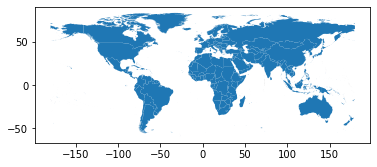

In [6]:
#data[data[‘attribute’] != ‘element’]
#removing certain aspects from the plot or from data, here removing Antarctica
world_data = world_data[world_data['NAME']!= 'Antarctica']
world_data.plot()

In [7]:
#world_data[world_data['NAME']=='Nepal'].plot()

Geographical data ma lat, long matra bhayera pugdaina CRS pani chaincha, <b>coordinate reference system!</b>
Datum pani chaincha, Ellipsoid pani chutai huncha 

Different Datum haruko chutai EPSG code bhanne huncha 
European Petroleum Survey Group

EPSG 3857 -> World Geodetic System 1984 (WGS84)
https://epsg.io/3857

This is projected coordinate system used for rendering maps in Google Maps, OpenStreetMap, etc.

<AxesSubplot:>

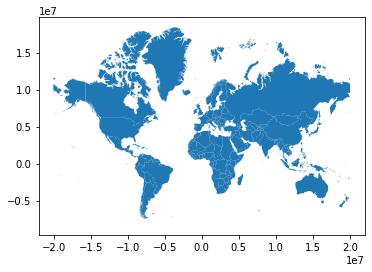

In [8]:
#changing the projection
current_crs = world_data.crs
world_data.to_crs(epsg=3857, inplace =True)
world_data.plot()

<AxesSubplot:>

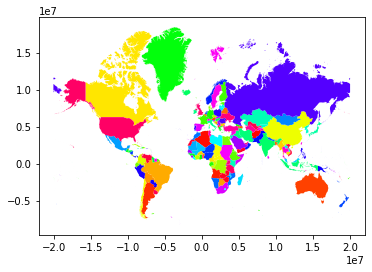

In [9]:
#plot using cmap(colormaps), cmap -> hsv, Pastel1-2, viridis, plasma, magma, tab20(b,c), 
world_data.plot(column ='NAME', cmap = 'hsv')

<AxesSubplot:>

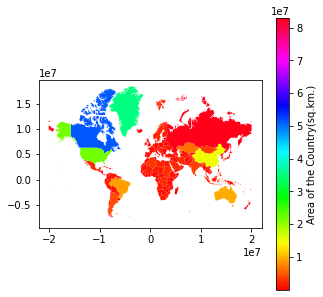

In [10]:
#recalculating area in sq. km. 
world_data['area'] = world_data.area/1000000
#adding a legend, legend-> bool, legend_kwds -> dictionary,
world_data.plot(column = 'area', cmap = 'hsv', legend = True,
               legend_kwds = {'label':"Area of the Country(sq.km.)"},
               figsize = (5,5))

We can also resize the legend using ax and cax arguments of plot(). 

    ax: matplotlib.pyplot. Artist (default None). axes on which to draw the plot.
    cax: matplotlib.pyplot Artist (default None). axes on which to draw the legend in case of color map.


<AxesSubplot:>

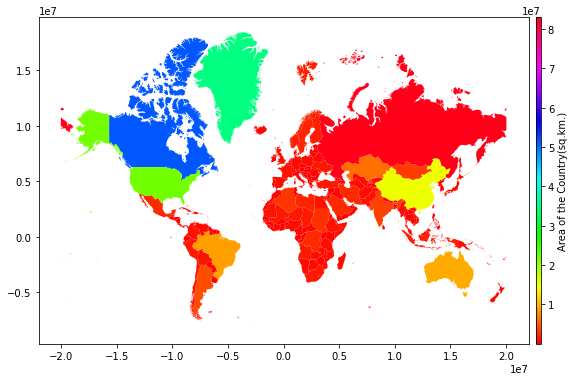

In [11]:
#resizing the legend
fig, ax = plt.subplots(figsize =(9,9))
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size ='1%', pad=0.1)
world_data.plot(column = 'area', cmap = 'hsv', legend = True,
               legend_kwds = {'label':"Area of the Country(sq.km.)"},
               ax=ax, cax=cax)